In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import os
import seaborn as sns


In [2]:
df_demo=pd.read_csv('traindemographics.csv')
df=pd.read_csv('trainperf.csv')
df_loan=pd.read_csv('trainprevloans.csv')
os.getcwd()

'C:\\Users\\Glo\\Desktop\\KAGGLE\\Credit_scoring'

In [3]:
# df_demo.head()

In [4]:
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [5]:
#train_df['bank_account_type']

In [6]:
df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


In [7]:
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [8]:

df['approveddate']=pd.to_datetime(df['approveddate']).dt.strftime('%Y-%m-%d')
df['creationdate']=pd.to_datetime(df['creationdate']).dt.strftime('%Y-%m-%d')

In [9]:
df['good_bad_flag'].value_counts()
df['good_bad_flag']=df['good_bad_flag'].replace({'Good':1,'Bad':0})

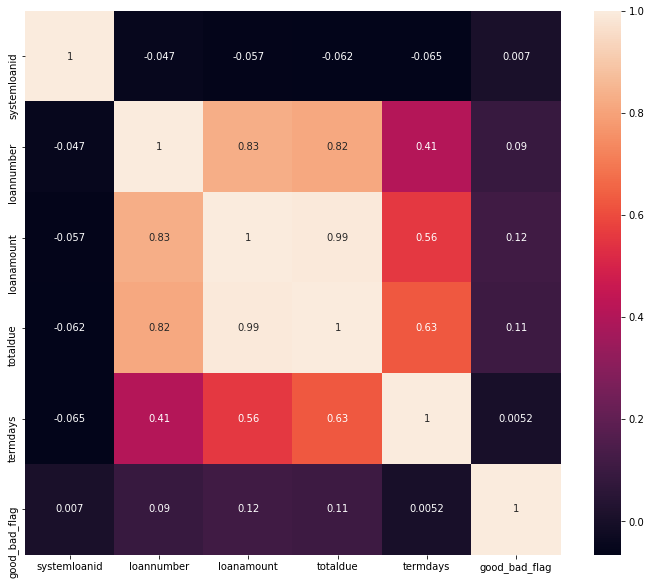

In [10]:
cor=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

In [13]:
cor_targets=abs(cor['good_bad_flag'])
relevant_targets=cor_targets[cor_targets>0.005]
relevant_targets

systemloanid     0.007048
loannumber       0.090487
loanamount       0.115267
totaldue         0.108357
termdays         0.005160
good_bad_flag    1.000000
Name: good_bad_flag, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
customerid       4368 non-null object
systemloanid     4368 non-null int64
loannumber       4368 non-null int64
approveddate     4368 non-null object
creationdate     4368 non-null object
loanamount       4368 non-null float64
totaldue         4368 non-null float64
termdays         4368 non-null int64
referredby       587 non-null object
good_bad_flag    4368 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 341.3+ KB


In [15]:
col=['systemloanid','loannumber','loanamount','totaldue','termdays']
col1=['systemloanid','loannumber','loanamount','totaldue','termdays','good_bad_flag']
x= df[col]
y = df.good_bad_flag
print(y.shape,x.shape)

(4368,) (4368, 5)


In [16]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore') # to supress warnings
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
#from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier


In [17]:
df.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,NaN,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,NaN,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,NaN,1


In [18]:
test_df=pd.read_csv('testperf.csv')
test_df.head()
#col=['systemloanid','loannumber','loanamount','totaldue',]

col2=['customerid','systemloanid','loannumber','loanamount','totaldue','termdays']
y_col= test_df[col2]
y_col.head()

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30


In [20]:
y_col1=y_col.drop('customerid',axis=1)

In [21]:
X=pd.get_dummies(x)
df1=pd.get_dummies(df)
y_col2=pd.get_dummies(y_col1)

In [22]:
# # rescale the metrics to the same mean and standard deviation
# scaler=preprocessing.StandardScaler()
# X=scaler.fit(X).transform(X)


In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=50)

In [24]:
# list of different classifiers we are going to test
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
'XGBClassifier': XGBClassifier()
}

In [25]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred,average='macro'),
                     'Recall_score': metrics.recall_score(y_test, y_pred,average='macro'),
                     'F1_score': metrics.f1_score(y_test, y_pred,average='macro'),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.391304,0.500000,0.439024,0.782609
1,GaussianNB,0.391304,0.500000,0.439024,0.782609
2,RandomForest,0.540090,0.537573,0.538517,0.695652
3,DecisionTreeClassifier,0.537352,0.538743,0.537933,0.679634
4,SVM,0.641628,0.501901,0.444154,0.782609
5,KNeighborsClassifier,0.525361,0.515497,0.510020,0.726545
6,GradientBoosting,0.620088,0.508772,0.463143,0.781465
7,XGBClassifier,0.692405,0.506433,0.454535,0.783753


In [26]:
print(len(df[df['good_bad_flag']==1]))
print(len(df[df['good_bad_flag']==0]))

3416
952


In [29]:
# Function to optimize model using gridsearch 
def gridsearch(model, params,x_train, x_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(x_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print( 'Best AUC on Test set: ', gs.score(x_test, y_test))

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[0,1]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Non_Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Non_defaulter',])
    print( conf)

# Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()
    
def model(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    #prob = md.predict_proba(x_test)[:,1]
    print( ' ' )
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print( 'Accuracy on Test set: ', md.score(x_test, y_test))
    print( ' ')
    print(classification_report(y_test, pred))
    print( ' ')
    print('Confusion Matrix',confmat(pred, y_test))
    
    #roc(prob, y_test)
    return md

In [32]:


# xgb = XGBClassifier(
#  learning_rate =0.04,
#  n_estimators=220,
#  max_depth=7,
#  min_child_weight=0,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  #objective= 'binary:logistic',
#  nthread=1,
#  scale_pos_weight=1,
#  seed=27)
# model_xgb = model(xgb, x_train, y_train,x_test, y_test)
# Use gridsearch to fine tune the parameters
xgb = XGBClassifier()
xgb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02,0.03, 0.05, 0.1]}
gridsearch(xgb, xgb_params,x_train, x_test, y_train, y_test,8)

Best params:  {'learning_rate': 0.1, 'n_estimators': 100}
Best AUC on Train set:  0.7830566685746995
Best AUC on Test set:  0.7837528604118993


In [39]:
# gb = GradientBoostingClassifier(learning_rate= 0.03, max_depth= 7,n_estimators=300, max_features = 0.9,min_samples_leaf = 5)
# model_gb = model(gb, x_train, y_train,x_test, y_test)

xgb = XGBClassifier(learning_rate= 0.01, max_depth= 7,n_estimators=100, max_features = 0.9,min_samples_leaf = 5)
model_gb = model(xgb, x_train, y_train,x_test, y_test)

 
Accuracy on Train set:  0.8019461934745278
Accuracy on Test set:  0.7780320366132724
 
              precision    recall  f1-score   support

           0       0.44      0.08      0.13       190
           1       0.79      0.97      0.87       684

    accuracy                           0.78       874
   macro avg       0.62      0.53      0.50       874
weighted avg       0.72      0.78      0.71       874

 
               Predicted Defaulter  Predicted Non_defaulter
Defaulter                       15                      175
Non_Defaulter                   19                      665
Confusion Matrix None


In [40]:
# index=test_df['customerid']
# index.head()

In [41]:
y_predicted = xgb.predict(y_col1)
y_predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
submissions=pd.DataFrame()
submissions['customerid']=y_col.customerid

In [44]:
submissions['good_bad_flag']=y_predicted

In [46]:
submissions.to_csv("Submission02.csv", index=False)

In [45]:
submissions['good_bad_flag'].value_counts()

1    1389
0      61
Name: good_bad_flag, dtype: int64